# IBM HR Analytics Attrition and employee performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
from holoviews import dim, opts
from bokeh.palettes import Spectral6
import configparser
import hvplot.pandas
import json
from bokeh.plotting import figure, show
hv.extension('bokeh')
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Eploratory Data Analysis

- ### Data cleaning

In [4]:
df.info() 

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

#### Categorical features
We take the features with less or equal to 30 unique values

In [6]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [7]:
len(object_col)

8

##### Discontinous

In [8]:
disc_col = []
for column in df.columns:
    if df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : [4 2 3 1]
MaritalStatus : ['Single' 'Married' 'Divorced']
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : ['Yes' 'No']
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel :

In [9]:
len(disc_col)

23

We need to change categorical columns in numerical by using LabelEncoder()

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in object_col:
    df[col] = label.fit_transform(df[col])


In [11]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

#### Continous feature

In [12]:
cont_col = []
for column in df.columns:
    if df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [13]:
len(cont_col)

7

- ### Data visualization

Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

For classification tasks, Our target variable is categorical. Therefore, we recommend segmenting key numeric features by the target variable. 

Use bar plot to see the variance between attrition and other features

Separe feature from attrition

In [14]:
col=list(df.columns)

In [15]:
print(col)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [17]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300) 

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees

#### Conclusion

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

- BusinessTravel : The workers who travel a lot are more likely to quit then other employees.

- Department : The worker in Research & Development are more likely to stay then the workers on other departement.

- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

- Gender : The Male are more likely to quit.

- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

- MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

- OverTime : The workers who work more hours are likely to quit then others.


- ### Correlation Matrix

<AxesSubplot:>

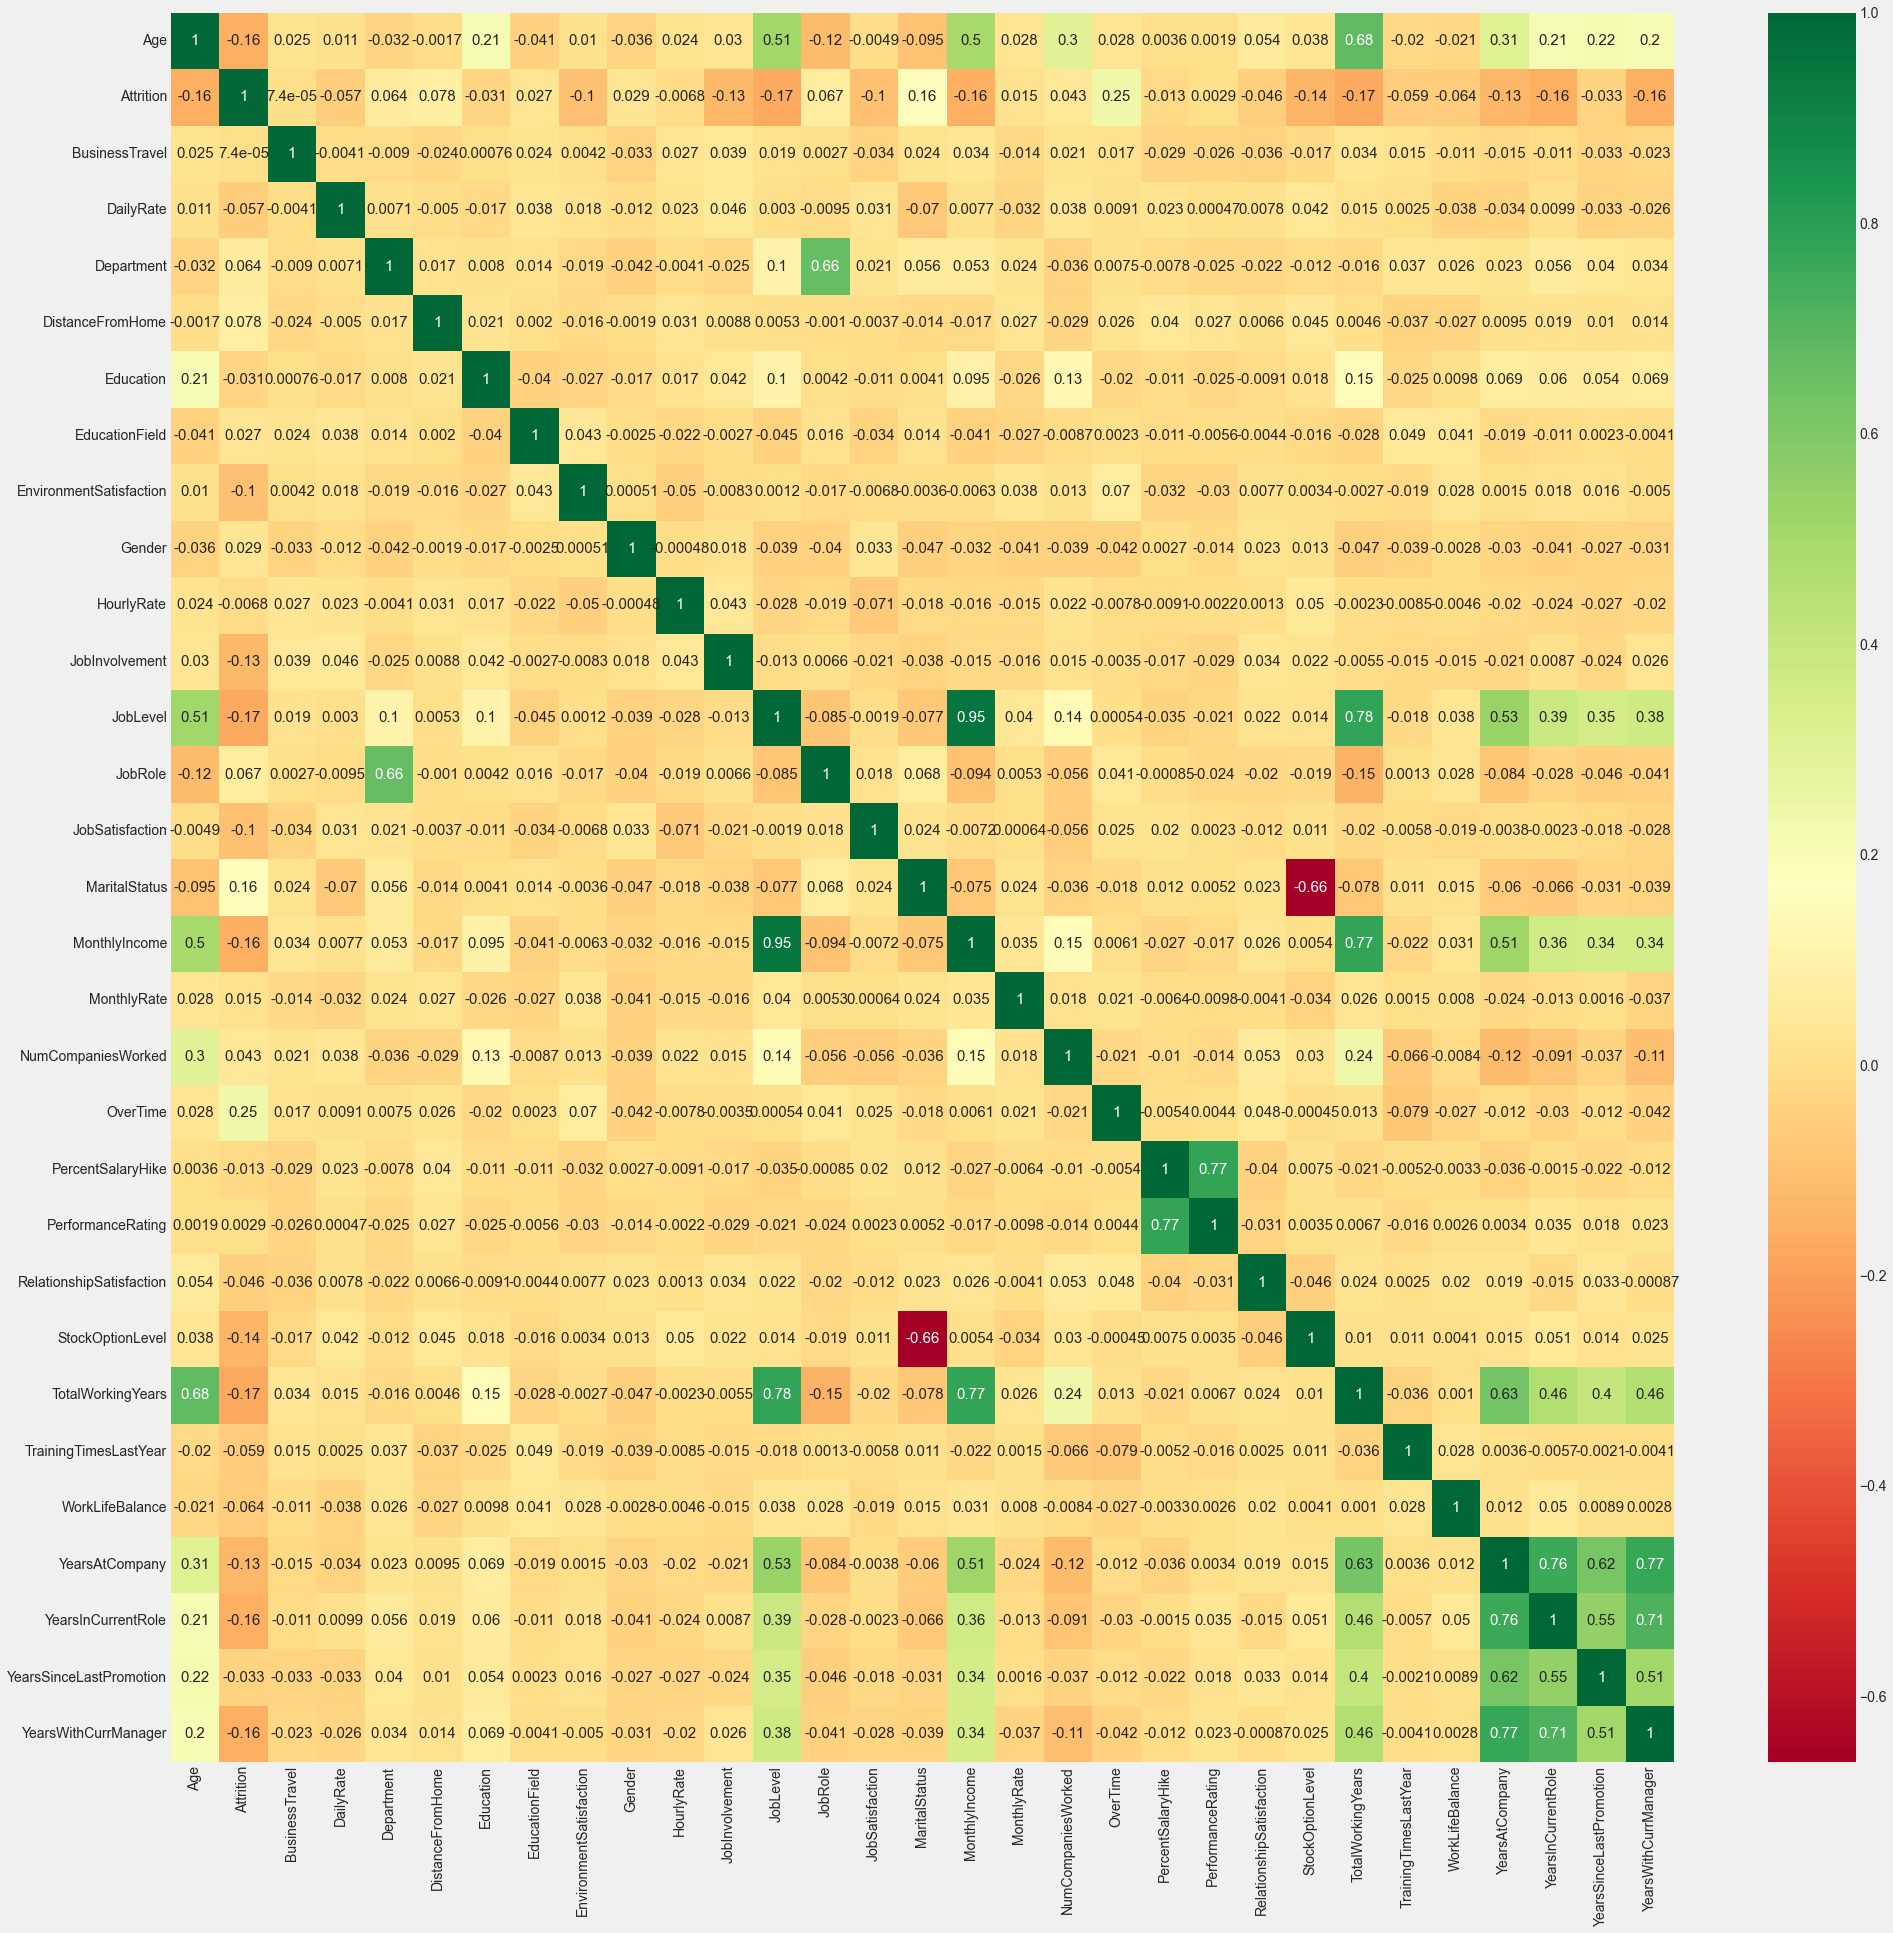

In [18]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

#### Attrition correlation

<AxesSubplot:>

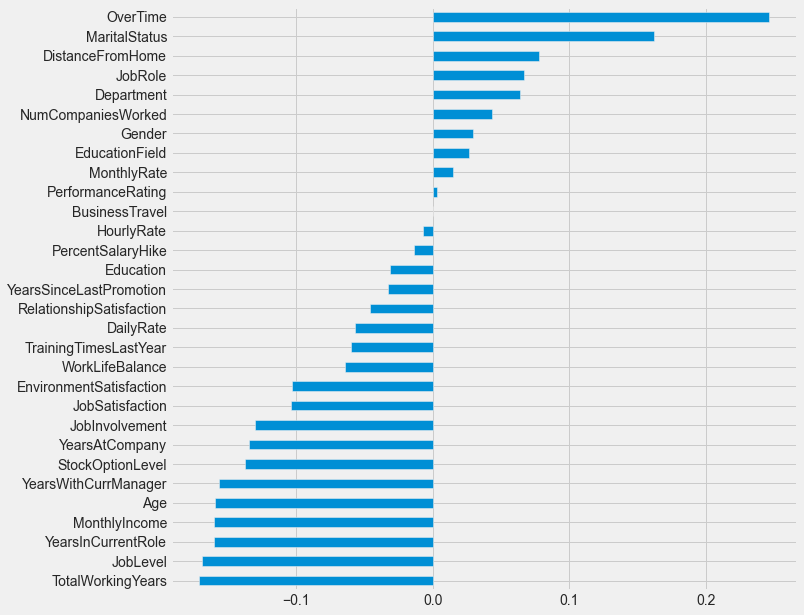

In [19]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(10, 10))

#### JobSatisfaction correlation

<AxesSubplot:>

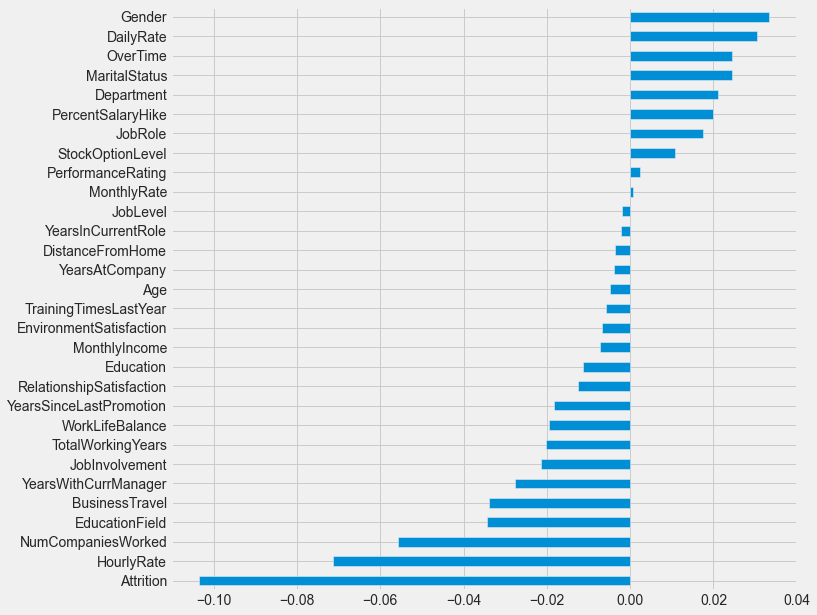

In [20]:
df.drop('JobSatisfaction', axis=1).corrwith(df.JobSatisfaction).sort_values().plot(kind='barh', figsize=(10, 10))

In [21]:
df.drop('JobSatisfaction', axis=1).corrwith(df.JobSatisfaction).sort_values()

Attrition                  -0.10
HourlyRate                 -0.07
NumCompaniesWorked         -0.06
EducationField             -0.03
BusinessTravel             -0.03
YearsWithCurrManager       -0.03
JobInvolvement             -0.02
TotalWorkingYears          -0.02
WorkLifeBalance            -0.02
YearsSinceLastPromotion    -0.02
RelationshipSatisfaction   -0.01
Education                  -0.01
MonthlyIncome              -0.01
EnvironmentSatisfaction    -0.01
TrainingTimesLastYear      -0.01
Age                        -0.00
YearsAtCompany             -0.00
DistanceFromHome           -0.00
YearsInCurrentRole         -0.00
JobLevel                   -0.00
MonthlyRate                 0.00
PerformanceRating           0.00
StockOptionLevel            0.01
JobRole                     0.02
PercentSalaryHike           0.02
Department                  0.02
MaritalStatus               0.02
OverTime                    0.02
DailyRate                   0.03
Gender                      0.03
dtype: flo

#### PerformanceRating correlation

<AxesSubplot:>

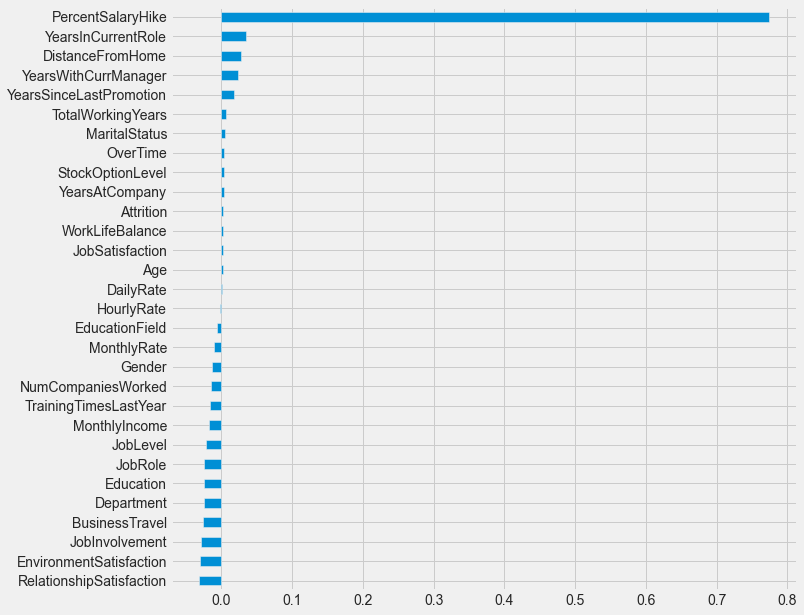

In [22]:
df.drop('PerformanceRating', axis=1).corrwith(df.PerformanceRating).sort_values().plot(kind='barh', figsize=(10, 10))

#### Analysis of correlation results 

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working years.
- Monthly income is highly correlated with total working years.
- Age is also positively correlated with the Total working years.
- Marital status and stock option level are negatively correlated

## Data Processing

In [23]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')

In [24]:
data.shape

(1470, 136)

In [25]:
data.dtypes

Age                        int64
Attrition                  int32
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
                           ...  
YearsWithCurrManager_13    uint8
YearsWithCurrManager_14    uint8
YearsWithCurrManager_15    uint8
YearsWithCurrManager_16    uint8
YearsWithCurrManager_17    uint8
Length: 136, dtype: object

<AxesSubplot:>

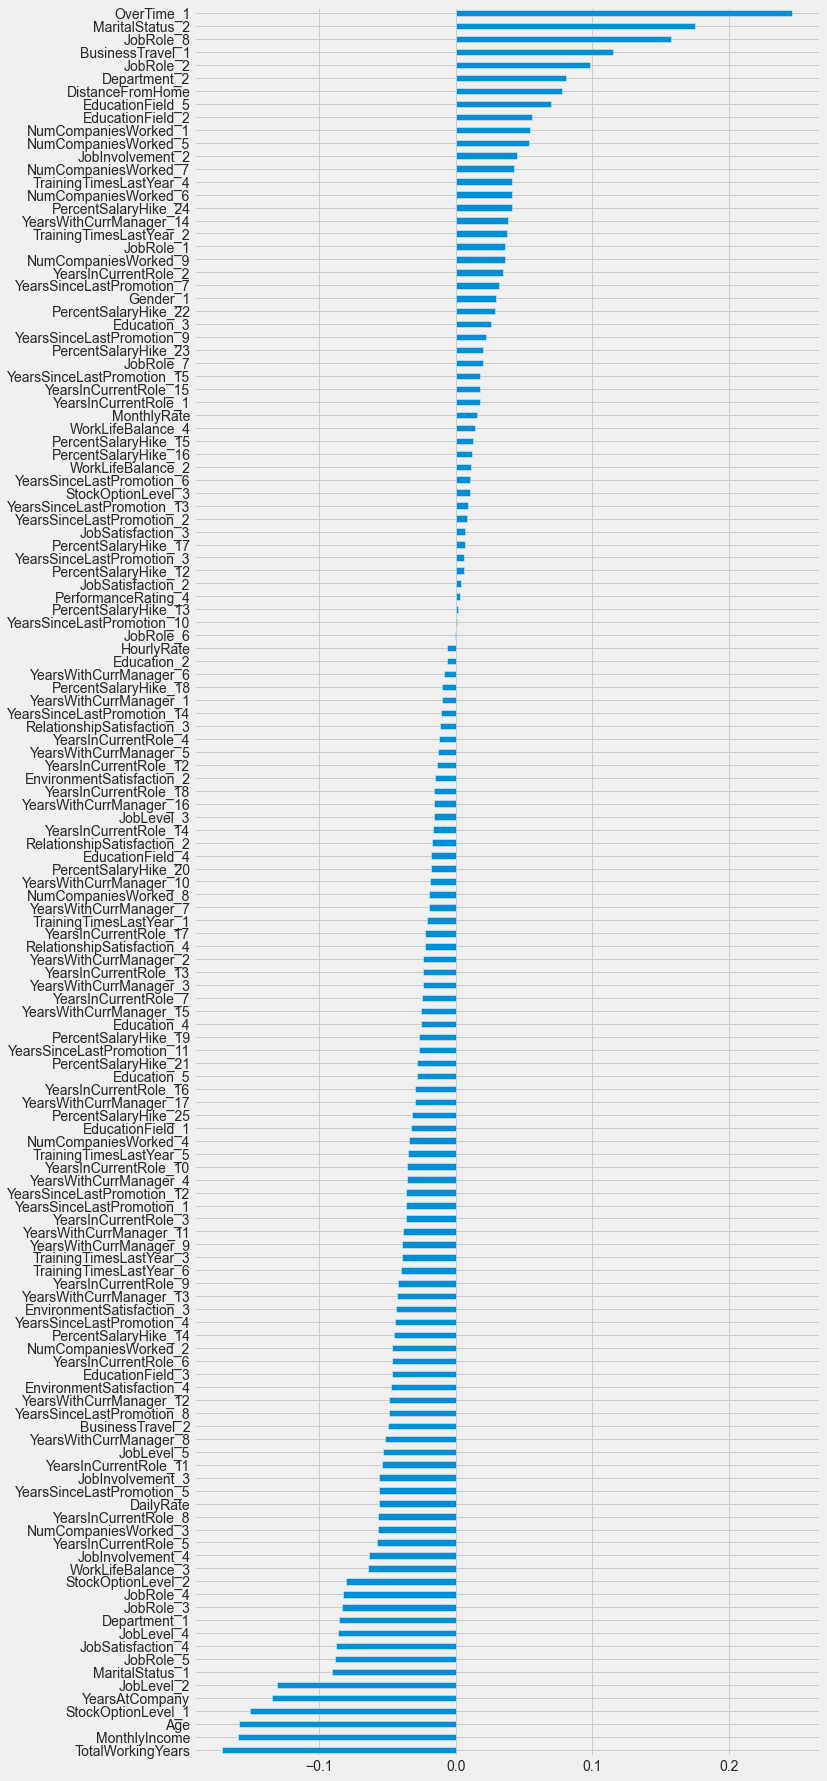

In [26]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

##  Applying machine learning algorithms

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [29]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%.

In [30]:
round((y_test.value_counts()[0] / y_test.shape[0]), 2)

0.84

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

- ### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.88      0.93       0.91          0.93
recall      0.98   0.64      0.93       0.81          0.93
f1-score    0.96   0.75      0.93       0.85          0.92
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.56      0.85       0.73          0.84
recall      0.94  0.39      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


- ### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
                                    )

rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[362   8]
 [ 63   8]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.50      0.84       0.68          0.80
recall      0.98  0.11      0.84       0.55          0.84
f1-score    0.91  0.18      0.84       0.55          0.79
support   370.00 71.00      0.84     441.00        441.00


In [34]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 15 151]]
ACCURACY SCORE:
0.9854
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.91      0.99       0.95          0.99
f1-score    0.99   0.95      0.99       0.97          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 63   8]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.44      0.83       0.65          0.79
recall      0.97  0.11      0.83       0.54          0.83
f1-score    0.91  0.18      0.83       0.54          0.79
support   370.00 71.00      0.83     441.00        441.00


#### Features importance according to Random Forest

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

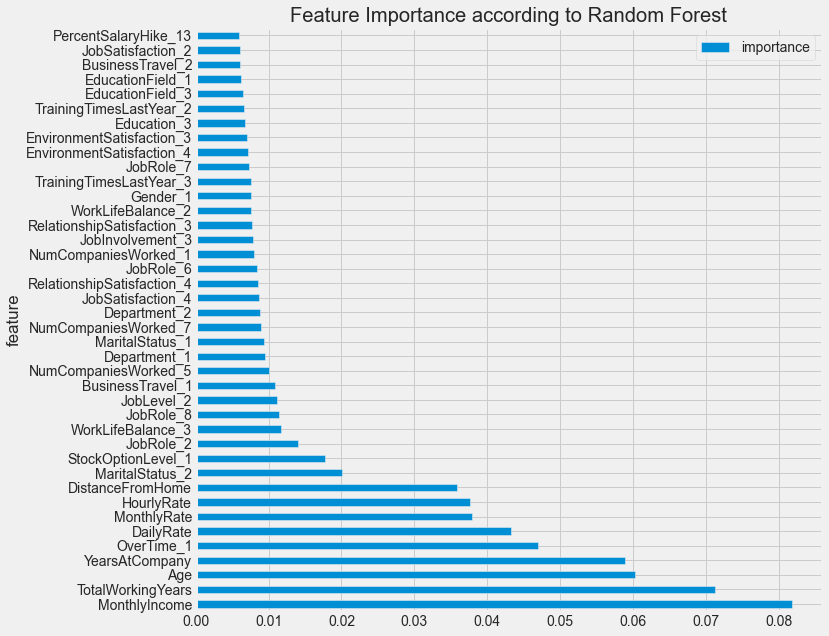

In [35]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

- ### XGBoost Clasifier

In [36]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 52  19]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.66      0.86       0.76          0.84
recall      0.97  0.27      0.86       0.62          0.86
f1-score    0.92  0.38      0.86       0.65          0.83
support   370.00 71.00      0.86     441.00        441.00


Text(0.5, 1.0, 'Feature Importance according to XGBoost')

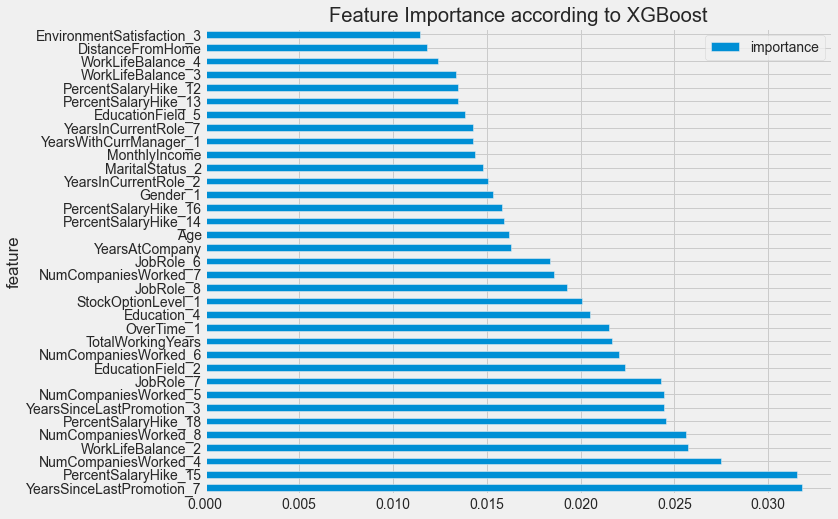

In [38]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

- ### Compare models

In [39]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [40]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

In [41]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

In [42]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

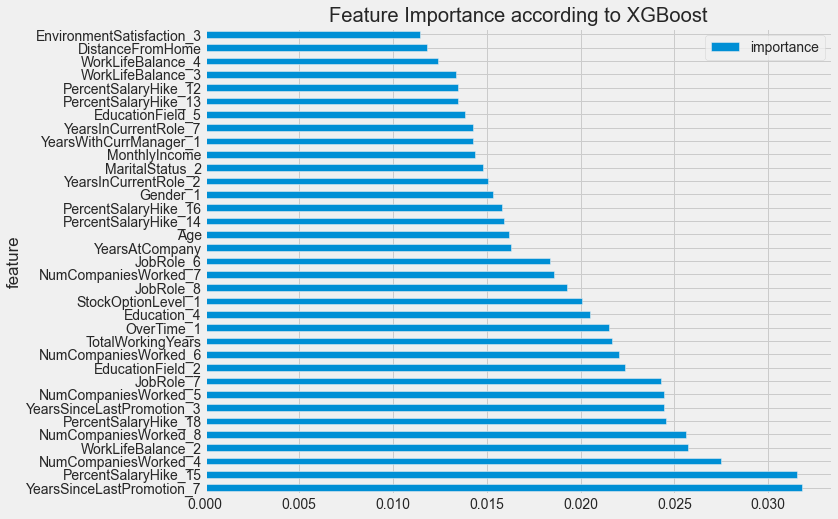

In [45]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

- ### Choix du meilleur modèle

In [43]:
ml_models = {
    'Random Forest': rf_clf, 
    'Logistic Regression': lr_clf,
    'XGBoost': xgb_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.2f}")

RANDOM FOREST                  roc_auc_score: 0.54
LOGISTIC REGRESSION            roc_auc_score: 0.55
XGBOOST                        roc_auc_score: 0.62


In [44]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)